In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from itertools import product
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Markdown
def print_markdown(string):
    display(Markdown(string))
def printmd(string):
    display(Markdown(string))

In [2]:
n_nodes = 500
k = 4

In [3]:
nodes = list(range(1, n_nodes+1))

In [4]:
edges = []
for i in range(n_nodes):
    for close_index in range(1,int(k/2)+1):
        j = ((i%n_nodes)+close_index)%n_nodes
        edges.append((i+1, j+1)) # nodes start from 1

In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [ ]:
plt.figure(figsize=(20, 20))
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color='#FFA07A', arrowsize=30, node_size=3000, font_size=40, font_color='white', with_labels=True)

In [7]:
A = {}
A['susceptible'] = 0
A['infected'] = 1
A['recovered'] = 2
printmd("$\mathcal{A}$=")
for a in A:
    print(a + ": " + str(A[a]))

$\mathcal{A}$=

susceptible: 0
infected: 1
recovered: 2


In [9]:
# Number of agents
n_agents = len(G)
ro = 0.7
beta = 0.3
# Adjacency matrix
W = nx.convert_matrix.to_numpy_matrix(G)

In [10]:
n_infected_initial = 10
weeks = 15

In [11]:
# Simulates an epidemic on an unweighted graph whith adjacency matrix W.
# Diseas propagation model is a discrete-time version of the SIR epidemic model.
# 'A': dictionary with possible states.
# 'beta': probability that the infection is spread from an infected individual to a susceptible one (given that they are connected by a link) during one time step.
# 'ro': probability that an infected individual will recover during one time step.
# 'n_infected_initial': number of infected nodes in initial configuration.
# 'n_steps': time units for which the simulation will go on.
# If mode is 'global', global clock is used and the conditional probability matrix T must be the matrix Q (jump chain of the CTMC)
# If mode is 'local', local clock is used and the conditional probability matrix T must be the matrix P

# It returns a matrix such that:
# each row i represents the state of each agent at time i.
# each column j represents the state of agent j.

def simulate(A, W, beta, ro, n_infected_initial = 10, n_steps = 15):

    n_agents = W.shape[0]
    
    # store the ids of visited configurations, describing the state of each agent
    states = np.zeros((n_steps, n_agents), dtype=int)
    # in the initial configuration, n_infected_initial random agents are infected
    x0 = np.zeros(n_agents)
    x0[np.random.choice(n_agents, n_infected_initial, replace=False)] = 1 # replace=False to avoid the same node be chosen twice
    # define initial state id (time 0)
    states[0] = x0

    # for each step of the simulation
    for i in range(1,n_steps): # for each unit of time
        for j in range(n_agents): # for each agent
            if states[i-1,j] == A['susceptible']: # if j-th agent is 'susceptible'
                m = np.sum(states[i-1][np.where(W[j]==1)[1]]==A['infected']) # calculate the number of infected neighbours of j-th agent
                probability = 1 - ((1-beta)**m) # calculate probability for j-th agent to get infected
                if np.random.rand() < probability:
                    states[i,j] = A['infected'] # j-th agent get infected
                else:
                    states[i,j] = states[i-1,j] # j-th agent does not get infected
            if states[i-1,j] == A['infected']:  # if j-th agent is 'susceptible'
                probability = ro # calculate probability for j-th agent to get recovered
                if np.random.rand() < probability:
                    states[i,j] = A['recovered'] # j-th agent get recovered
                else:
                    states[i,j] = states[i-1,j] # j-th agent does not get infected
            if states[i-1,j] == A['recovered']: # if j-th agent is 'recovered'
                states[i,j] = states[i-1,j] # j-th agent does not modify its state
    return states

In [13]:
# run 1 simulation and plot state values at each time unit.
states = simulate(A, W, beta, ro, n_infected_initial, weeks)
A_rev = dict((v,k) for k,v in A.items())
for t in range(0,weeks):
    x = states[t]
    print("Time unit " + str(t))
    print("state:")
    display(pd.DataFrame(data=[A_rev[z] for z in x], index=np.arange(1, len(G)+1), columns=['state'])) # nodes start from 0
    n_susc = np.sum(x==A['susceptible'])
    n_inf = np.sum(x==A['infected'])
    n_rec = np.sum(x==A['recovered'])
    print("Susceptible agents =", n_susc)
    print("Infected agents =", n_inf)
    print("Recovered agents =", n_rec)
    print()

Time unit 0
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,susceptible
5,susceptible
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 490
Infected agents = 10
Recovered agents = 0

Time unit 1
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,susceptible
5,susceptible
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 478
Infected agents = 13
Recovered agents = 9

Time unit 2
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,susceptible
5,susceptible
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 466
Infected agents = 14
Recovered agents = 20

Time unit 3
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,susceptible
5,susceptible
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 456
Infected agents = 17
Recovered agents = 27

Time unit 4
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,infected
5,infected
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 448
Infected agents = 11
Recovered agents = 41

Time unit 5
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,infected
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 445
Infected agents = 6
Recovered agents = 49

Time unit 6
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 444
Infected agents = 1
Recovered agents = 55

Time unit 7
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 443
Infected agents = 1
Recovered agents = 56

Time unit 8
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 441
Infected agents = 2
Recovered agents = 57

Time unit 9
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 441
Infected agents = 2
Recovered agents = 57

Time unit 10
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 439
Infected agents = 3
Recovered agents = 58

Time unit 11
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 439
Infected agents = 0
Recovered agents = 61

Time unit 12
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 439
Infected agents = 0
Recovered agents = 61

Time unit 13
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 439
Infected agents = 0
Recovered agents = 61

Time unit 14
state:


,state
1,susceptible
2,susceptible
3,susceptible
4,recovered
5,recovered
...,...
496,susceptible
497,susceptible
498,susceptible
499,susceptible


Susceptible agents = 439
Infected agents = 0
Recovered agents = 61



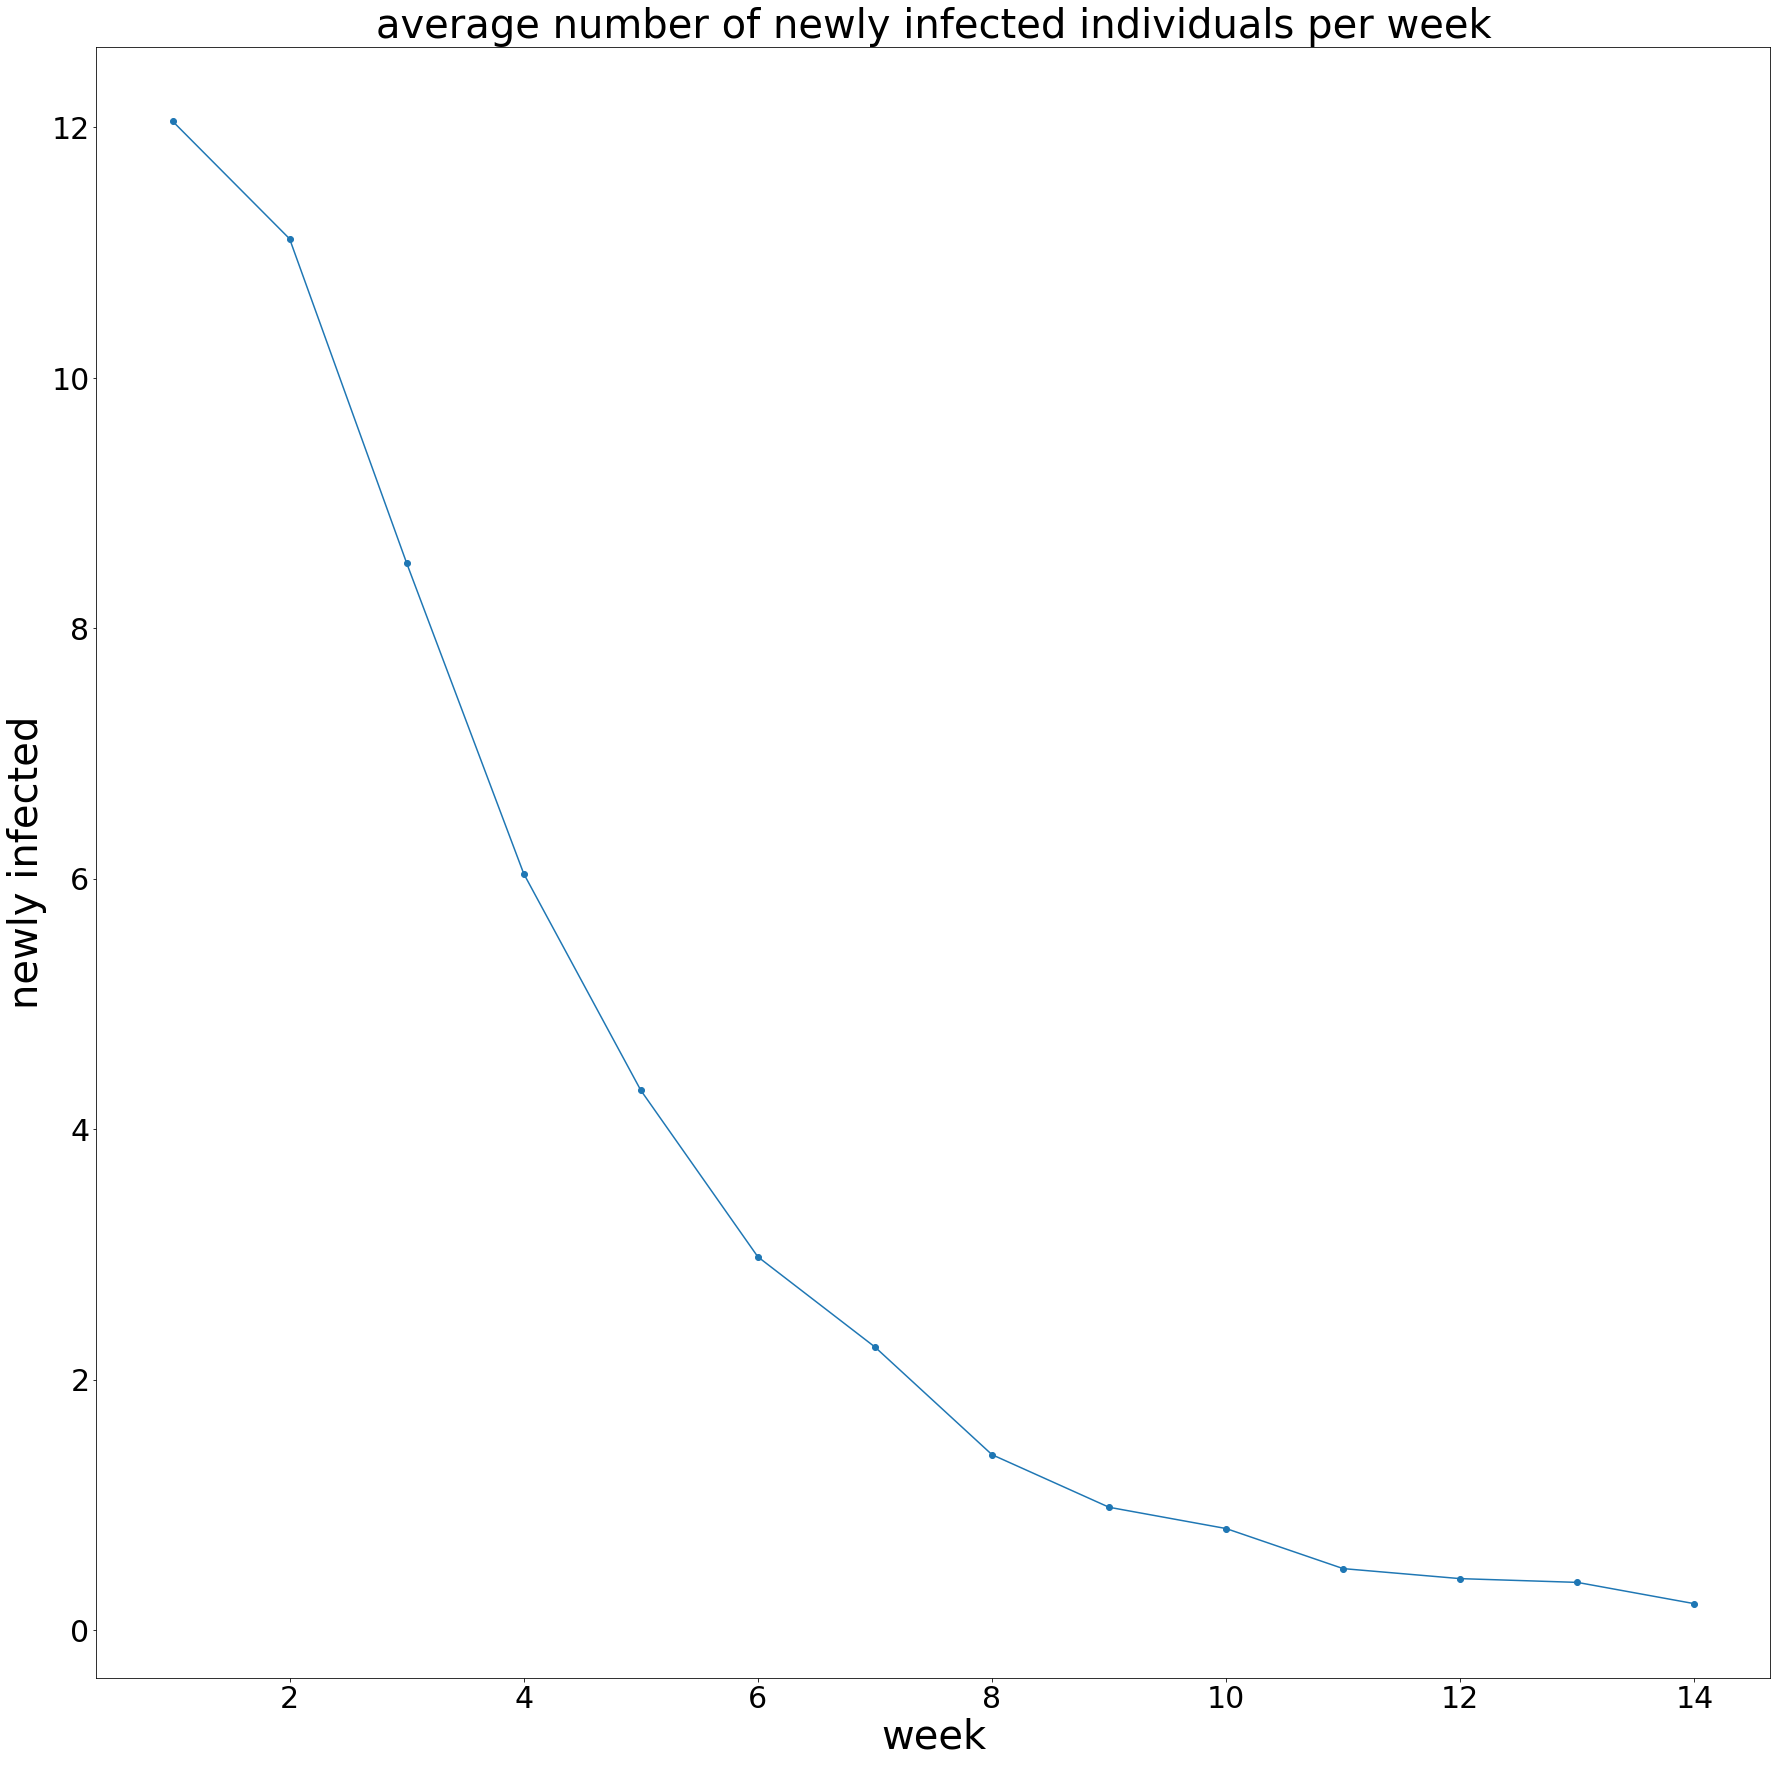

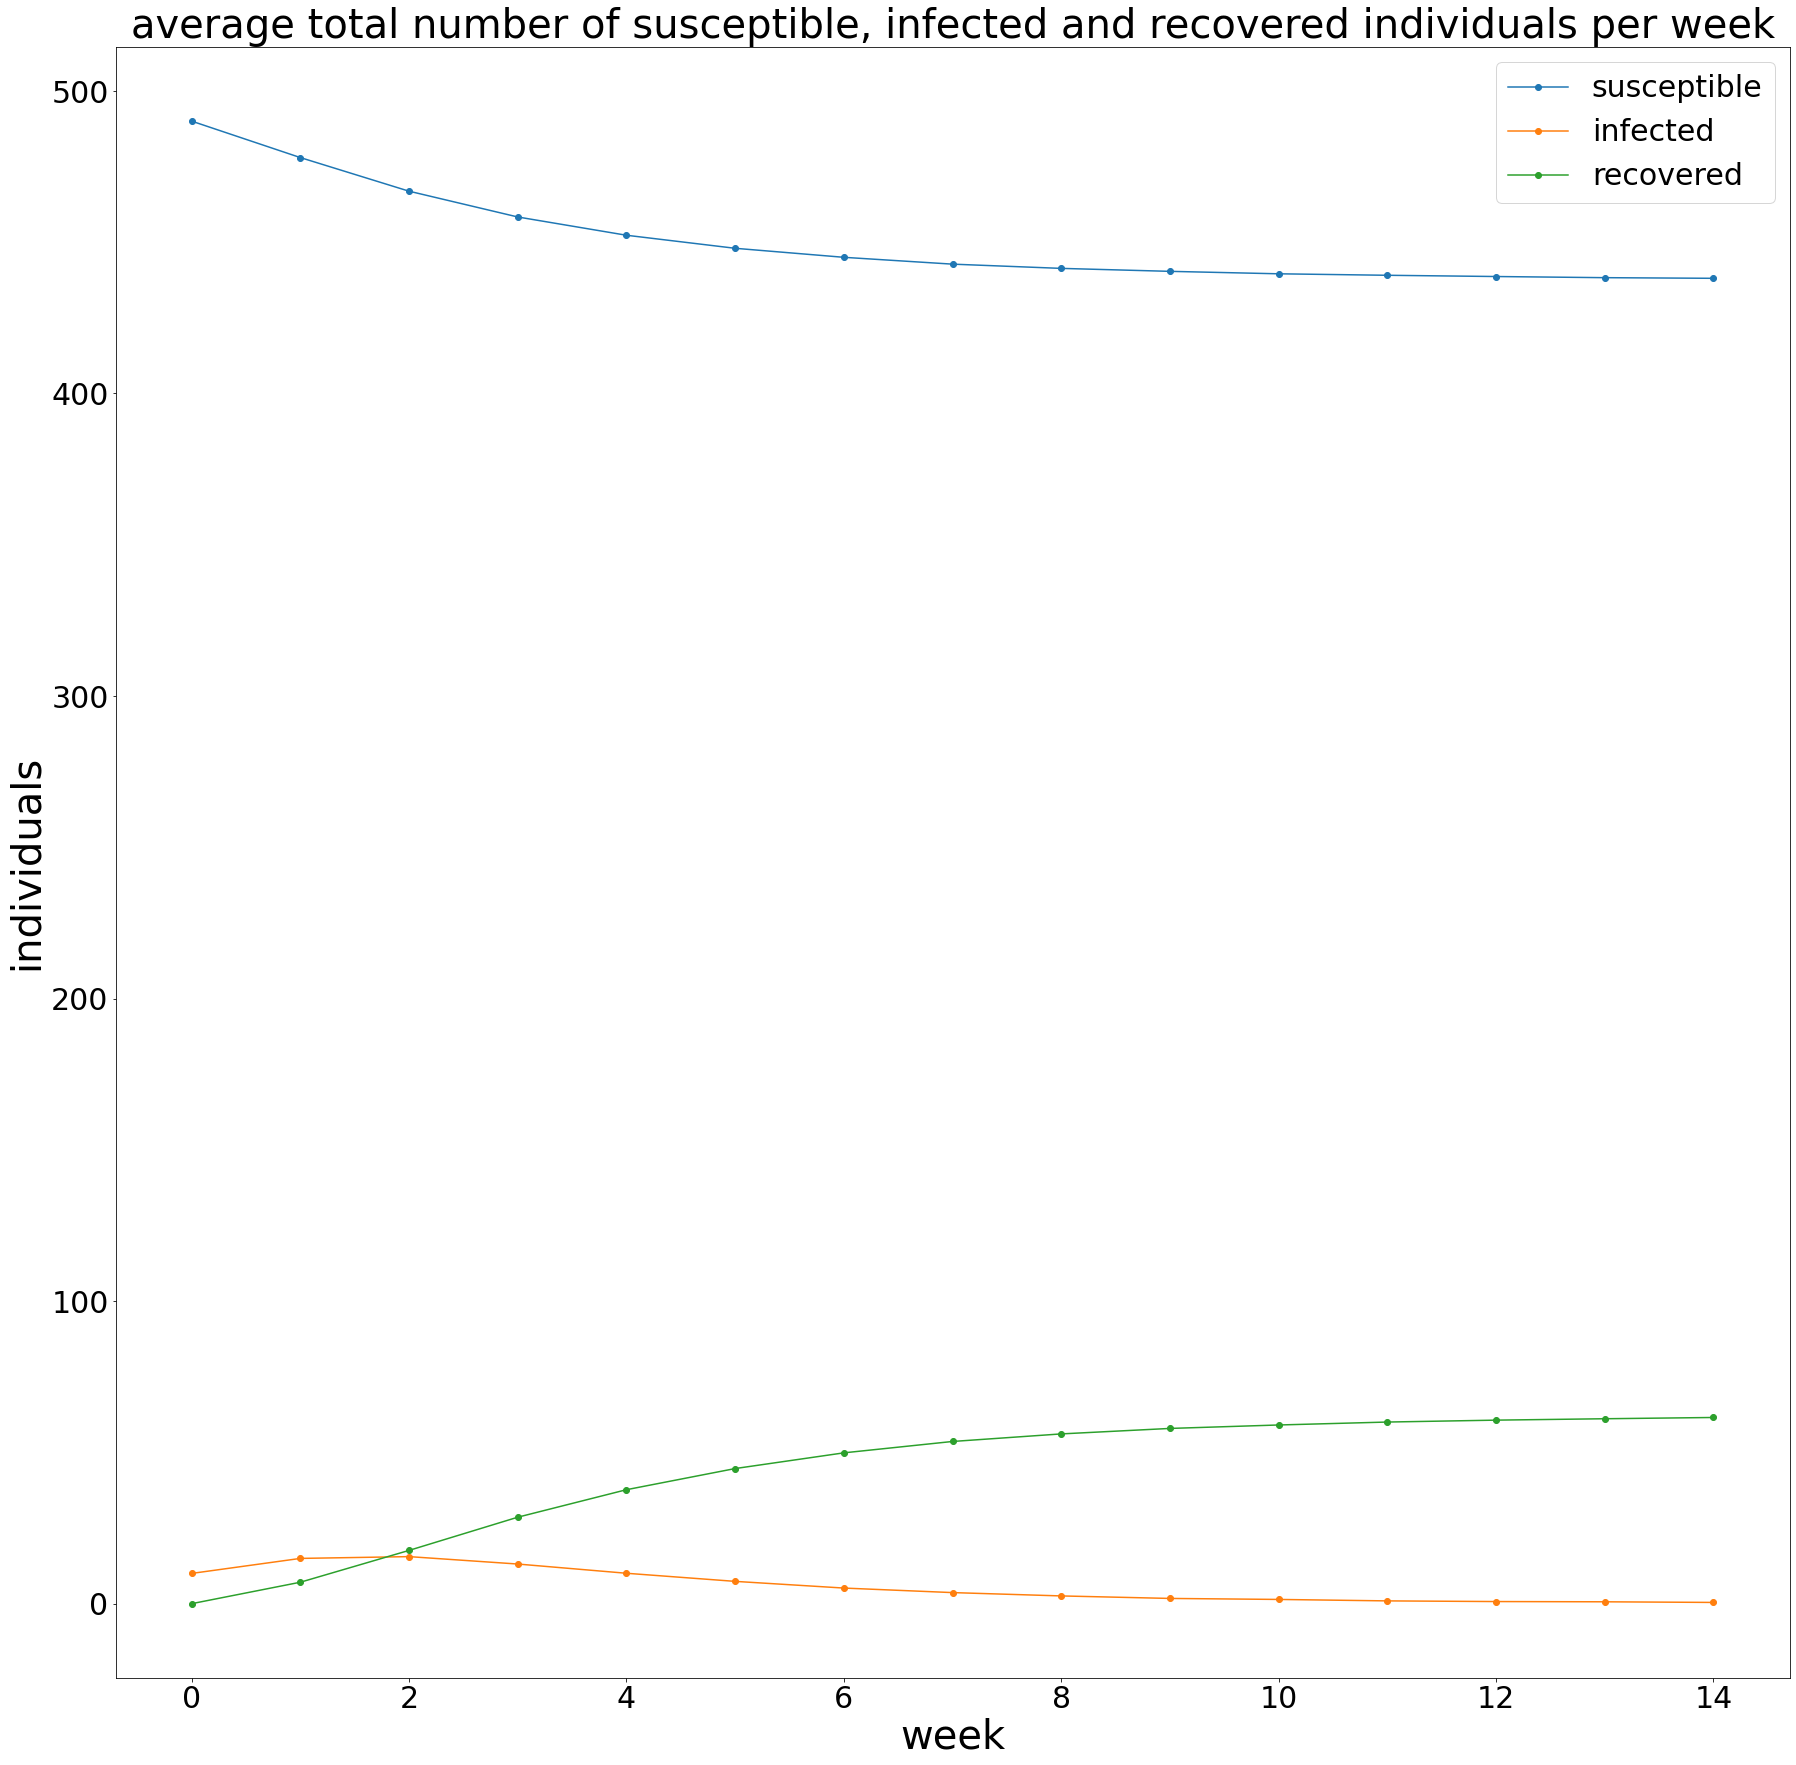

In [15]:
n_simulations = 100
stats = np.zeros((3,n_simulations, weeks))
cum_newly_infected = np.zeros((n_simulations, weeks-1))
A_rev = dict((v,k) for k,v in A.items())
for i in range(n_simulations):
    states = simulate(A, W, beta, ro, n_infected_initial, weeks)
    newly_infected = np.array([np.sum(np.logical_and(states[i-1]==A['susceptible'], states[i]==A['infected'])) for i in range(1, weeks)]) # newly infected agent are such that at time unit i-1 they were suscptible and at time unit i they are infected
    n_susc_per_week = np.sum(states==A['susceptible'],axis=1)
    n_inf_per_week = np.sum(states==A['infected'],axis=1)
    n_rec_per_week = np.sum(states==A['recovered'],axis=1)
    cum_newly_infected[i] = newly_infected
    stats[0,i] = n_susc_per_week
    stats[1,i] = n_inf_per_week
    stats[2,i] = n_rec_per_week
    
avg_newly_infected = np.mean(cum_newly_infected,axis=0)
avg_stats = np.mean(stats,axis=1)

plt.figure(figsize=(30, 30))
plt.plot(np.arange(1,weeks), avg_newly_infected, '-o')

plt.title('average number of newly infected individuals per week', fontsize = 40)
plt.xlabel('week', fontsize = 40)
plt.ylabel('newly infected', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


plt.figure(figsize=(30, 30))
for state in range(len(A)):
    plt.plot(np.arange(weeks), avg_stats[state], '-o', label = A_rev[state])

plt.title('average total number of susceptible, infected and recovered individuals per week', fontsize = 40)
plt.xlabel('week', fontsize = 40)
plt.ylabel('individuals', fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(fontsize = 30)

In [ ]:


# Plot the infection spread

pos = nx.circular_layout(G)
for t in range(0,n_steps):
    plt.figure(figsize=(20,20))
    x = states[t]
    print("Jump step " + str(t))
    print("state:")
    A_rev = dict((v,k) for k,v in A.items())
    display(pd.DataFrame(data=[A_rev[z] for z in x], index=np.arange(1, len(G)+1), columns=['state']))
    print()
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=(np.argwhere(x==0).T[0]+1).tolist(), # nodes start from 1
        node_color = 'r',
        arrowsize=30, 
        node_size=3000,
        font_size=40, 
        font_color='white')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=(np.argwhere(x==1).T[0]+1).tolist(), # nodes start from 1
        node_color = 'b',
        arrowsize=30, 
        node_size=3000,
        font_size=40, 
        font_color='white')
    nx.draw(G,
        pos = pos,
        with_labels=True,
        nodelist=(np.argwhere(x==2).T[0]+1).tolist(), # nodes start from 1
        node_color = 'g',
        arrowsize=30, 
        node_size=3000,
        font_size=40, 
        font_color='white')
    plt.title('jump step = {0}'.format(t+1))

In [ ]:
# Brutta

In [217]:
p = 0.4

    print("a")

In [104]:
x = np.round(np.random.rand(4)*3)

In [106]:
y = np.round(np.random.rand(4)*3)

In [111]:
beta, ro, m = 0.3, 0.7, 2

In [107]:
x

array([2., 1., 0., 1.])

In [139]:
n_config = 3**4
n_states = tuple(3 for _ in range(10))

In [140]:
print(n_config)

81


In [141]:
phi = np.array([[[1,0,0],
                 [0,1,0],
                 [0,0,1]], 
                [[0,1,0],
                 [0,1,0],
                 [0,0,1]],
                [[1,0,0],
                 [0,1,0],
                 [0,0,1]]])


In [143]:
y = (2, 1, 1, 0)
for x_id in range(n_config):
    # we create states in the form (0,1,1,0,0,1,...)
    x = np.unravel_index(x_id,shape=n_states)
    #print(y, x)
    p = 1
    for i in range(len(y)):
        p *= beta*phi[y[i], x[i], y[i]]
    print(p)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
